<a href="https://colab.research.google.com/github/dkalenov/Courier-company-analysis.-New-feature-s-A-B-test-Sales-Staff/blob/main/Courier_company_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task

#Task 1

The logistics company manager decided to conduct an A/B test, selecting delivery time by couriers as the metric. The control group retained the previous app navigation interface, while the test group implemented a new feature allowing the combination of multiple transportation modes. Delivery time results in minutes for the test and control groups are provided in CSV files: "times_couriers_control.csv" and "times_couriers_test.csv". Verify the manager's hypothesis that the app's new feature has reduced delivery time.

### 1) Hypotheses


Hypotheses:

H0: μ0 = μ1 - the mean delivery time in the test group is equal to the time in the control group.

H1: μ0 > μ1 - the mean delivery time in the test group is less than in the control group.

### 2) Data Preprocessing

In [1]:
from scipy import stats as st
import pandas as pd

# Data Extraction
control_group = pd.read_csv("https://raw.githubusercontent.com/dkalenov/Courier-company-analysis.-New-feature-s-A-B-test-Sales-Staff/main/times_couriers_control.csv")
control_group

,Unnamed: 0,time
0,0,10.88
1,1,14.11
2,2,8.51
3,3,6.43
4,4,24.32
...,...,...
467,467,16.86
468,468,19.50
469,469,8.15
470,470,7.80


In [2]:
test_group = pd.read_csv("https://raw.githubusercontent.com/dkalenov/Courier-company-analysis.-New-feature-s-A-B-test-Sales-Staff/main/times_couriers_test.csv")
test_group

,Unnamed: 0,time
0,0,12.69
1,1,13.51
2,2,16.19
3,3,9.77
4,4,8.81
...,...,...
467,467,14.10
468,468,23.18
469,469,9.98
470,470,15.26


In [3]:
print('Data for the control group')
# dataset size
print(f'Dataset size: {control_group.shape}\n')
# general dataset information
print('General dataset information:')
control_group.info()
print()
# check for duplicates
print(f'Duplicates found: {control_group.duplicated().sum()}')
# check for missing values
print(f'Missing values found: {control_group.isnull().sum()}')
print()
print('*' * 50)
print()

print('Data for the test group')
# dataset size
print(f'Dataset size: {test_group.shape}\n')
# general dataset information
print('General dataset information:')
test_group.info()
print()
# check for duplicates
print(f'Duplicates found: {test_group.duplicated().sum()}')
# check for missing values
print(f'Missing values found: {test_group.isnull().sum()}')

Data for the control group
Dataset size: (472, 2)

General dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  472 non-null    int64  
 1   time        472 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.5 KB

Duplicates found: 0
Missing values found: Unnamed: 0    0
time          0
dtype: int64

**************************************************

Data for the test group
Dataset size: (472, 2)

General dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  472 non-null    int64  
 1   time        472 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.5 KB

Duplicates found: 0
Missing values found: Unnamed: 0    0
time   

In [4]:
# Rename 'Unnamed: 0'
control_group = control_group.rename(columns={'Unnamed: 0': 'id'})
test_group = test_group.rename(columns={'Unnamed: 0': 'id'})

In [5]:
control_group.head(3)

,id,time
0,0,10.88
1,1,14.11
2,2,8.51


In [6]:
test_group.head(3)

,id,time
0,0,12.69
1,1,13.51
2,2,16.19


In [ ]:
control_group.describe()

,id,time
count,472.000000,472.000000
mean,235.500000,14.220763
std,136.398925,5.772502
min,0.000000,2.300000
25%,117.750000,9.647500
50%,235.500000,13.735000
75%,353.250000,18.900000
max,471.000000,29.040000


In [ ]:
test_group.describe()

,id,time
count,472.000000,472.000000
mean,235.500000,15.390508
std,136.398925,5.686440
min,0.000000,3.530000
25%,117.750000,10.520000
50%,235.500000,15.215000
75%,353.250000,20.342500
max,471.000000,26.460000


<Axes: ylabel='time'>

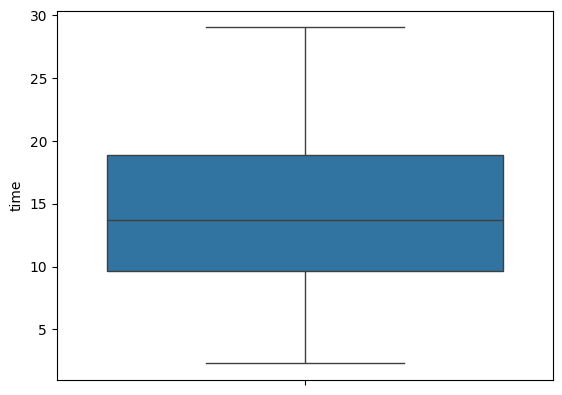

In [7]:
# Check for outliers
import seaborn as sns
# Outliers in the control group
sns.boxplot(data=control_group['time'])

<Axes: ylabel='time'>

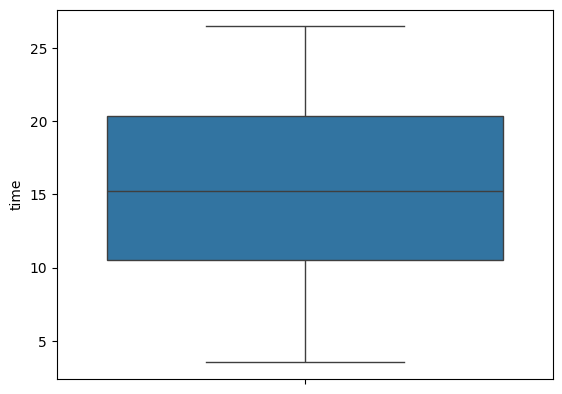

In [8]:
# Check for outliers
import seaborn as sns
# Outliers in test group
sns.boxplot(data=test_group['time'])


Brief summary: Both datasets have no duplicates, correct data types, and no missing values. There are no outliers in either dataset. The mean delivery time in the control group is lower than in the test group; the standard deviation in the control group is 5.77, while in the test group it is 5.68.

### 3) Plotting

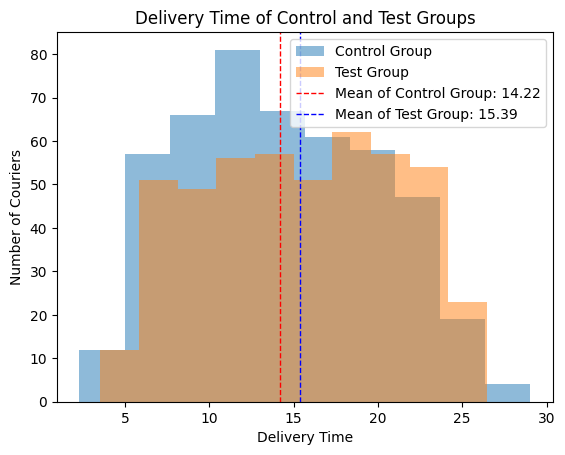

In [9]:
import matplotlib.pyplot as plt

# Histogram plotting
plt.hist(control_group['time'], bins=10, alpha=0.5, label='Control Group')
plt.hist(test_group['time'], bins=10, alpha=0.5, label='Test Group')

# Calculating and displaying the mean values of the samples
mean_control = control_group['time'].mean()
mean_test = test_group['time'].mean()
plt.axvline(x=mean_control, color='red', linestyle='dashed', linewidth=1, label='Mean of Control Group: {:.2f}'.format(mean_control))
plt.axvline(x=mean_test, color='blue', linestyle='dashed', linewidth=1, label='Mean of Test Group: {:.2f}'.format(mean_test))

# Graph settings
plt.xlabel('Delivery Time')
plt.ylabel('Number of Couriers')
plt.title('Delivery Time of Control and Test Groups')
plt.legend()

# Displaying the graph
plt.show()

### 4) Hypothesis Testing

In [10]:
from scipy import stats as st
alpha = 0.05  # level of significance


results = st.ttest_ind(test_group['time'], control_group['time'],
                       alternative="less")  # delivery time in the test group is less than in the control group

print('p-value:', results.pvalue)
print('t-statistic:', results.statistic)

if results.pvalue < alpha:
    print('Reject the null hypothesis. The introduction of the transportation combination option did not reduce delivery time.')
else:
    print('Fail to reject the null hypothesis. There is not enough evidence to claim that the introduced option reduced delivery time.')

p-value: 0.9991180560045553
t-statistic: 3.1363225525939744
Fail to reject the null hypothesis. There is not enough evidence to claim that the introduced option reduced delivery time.


# Задание 2

В этой же компании с 1 мая часто заказывающим клиентам предоставили
скидку, действующую на все заказы до конца календарного месяца, если в этом
месяце клиент уже сделал четыре заказа (то есть начиная с пятого заказа).
В файле clients_orders.csv представлена информация о количестве заказов,
которые одни и те же клиенты сделали в апреле и мае.
Проверьте гипотезу о том, что клиенты стали делать больше заказов после
введения скидки.

### 1) Гипотезы

ГИПОТЕЗЫ:

H0: μ0 = μ1 - после введения скидки количество заказов не изменилось

H1: μ0 <  μ1 -  клиенты стали делать больше заказов после введения скидки

### 2) Работа с данными

In [ ]:
from scipy import stats as st
import pandas as pd

# Загрузка данных
orders = pd.read_csv("clients_orders.csv")

In [ ]:
print('Данные по контрольной группе')
# размер датасета
print(f'Размер датасета:{orders.shape}\n')
# общая инфа о датасете
print(f'Общая информация о датасете:')
orders.info()
print()
# проверка на явные дубликаты
print(f'Дубликатов обнаружено: {orders.duplicated().sum()}')
# проверка на пропуски
print(f'Пропусков обнаружено: {orders.isnull().sum()}')

Данные по контрольной группе
Размер датасета:(74, 3)

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Unnamed: 0    74 non-null     int64
 1   orders_april  74 non-null     int64
 2   orders_may    74 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB

Дубликатов обнаружено: 0
Пропусков обнаружено: Unnamed: 0      0
orders_april    0
orders_may      0
dtype: int64


In [ ]:
orders = orders.rename(columns={'Unnamed: 0': 'id'})

2) отображение даннных

In [ ]:
orders.head()

,id,orders_april,orders_may
0,0,28,33
1,1,20,18
2,2,22,28
3,3,29,21
4,4,23,27


In [ ]:
orders.describe()

,id,orders_april,orders_may
count,74.000000,74.000000,74.000000
mean,36.500000,21.851351,24.108108
std,21.505813,5.413536,5.653384
min,0.000000,12.000000,14.000000
25%,18.250000,18.000000,19.250000
50%,36.500000,22.000000,23.500000
75%,54.750000,26.750000,28.000000
max,73.000000,31.000000,35.000000


<Axes: >

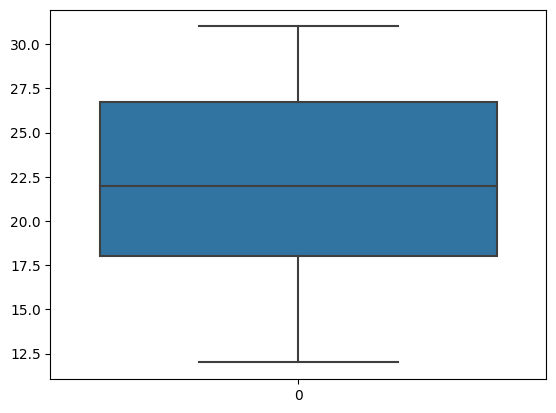

In [ ]:
# проверим на выбросы
import seaborn as sns
# выбросы в апреле
sns.boxplot(data=orders['orders_april'])

<Axes: >

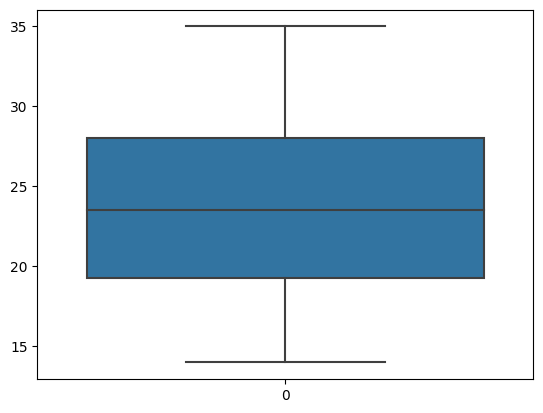

In [ ]:
# проверим на выбросы
import seaborn as sns
# выбросы в мае
sns.boxplot(data=orders['orders_may'])

Краткий вывод: в обоих датасетах отсутсвуют дубликаты, с типами данных всё ок, пропусков нет, выбрососв нет. Среднее количество заказов в апреле - 21.85, в мае - 24.10; стандартное отклонкник в апреле - 5.41, в мае - 5.65

### 3) Строим график

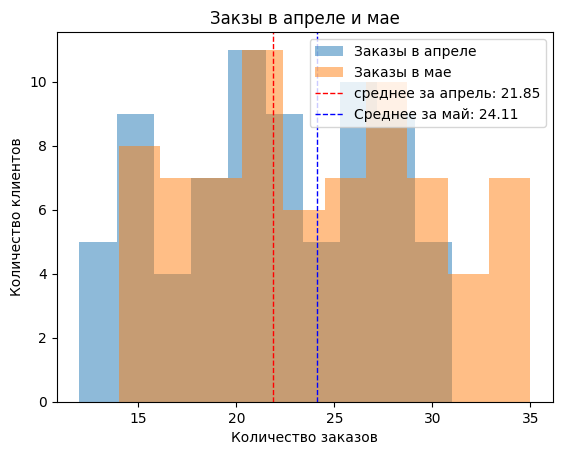

In [ ]:
import matplotlib.pyplot as plt

# Построение гистограмм
plt.hist(orders['orders_april'], bins=10, alpha=0.5, label='Заказы в апреле')
plt.hist(orders['orders_may'], bins=10, alpha=0.5, label='Заказы в мае')

# Расчет и отображение средних значений выборок
mean_control = orders['orders_april'].mean()
mean_test = orders['orders_may'].mean()
plt.axvline(x=mean_control, color='red', linestyle='dashed', linewidth=1, label='среднее за апрель: {:.2f}'.format(mean_control))
plt.axvline(x=mean_test, color='blue', linestyle='dashed', linewidth=1, label='Среднее за май: {:.2f}'.format(mean_test))

plt.xlabel('Количество заказов')
plt.ylabel('Количество клиентов')
plt.title('Закзы в апреле и мае')
plt.legend()

plt.show()

In [ ]:
# Проверка гипотезы

alpha = 0.05  # уровень статистической значимости

# Проведение парного t-теста
results = st.ttest_rel(orders['orders_april'], orders['orders_may'],
                       alternative ="less") # количество заказов после введения скидки увеличилось

print('p-значение:', results.pvalue)
print('t-статистика:', results.statistic)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Клиенты стали делать больше заказов после введения скидки')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Изменение заказов не является статистически значимым')

p-значение: 0.00538333571008088
t-статистика: -2.6173307841882494
Отвергаем нулевую гипотезу. Клиенты стали делать больше заказов после введения скидки


# Задание 3

В файле couriers_education.csv представлена анонимизированная информация
о курьерах компании: образование ( education ) и количество лет работы в
компании ( experience ).

Проверьте гипотезу о том, что стаж работы в компании зависит от уровня
образования.

Переменная **education** принимает значения:

- NS — no school — нет аттестата об окончании школы

- MS — middle school — закончены 9 классов школы

- S — school — среднее образование: закончена средняя школа

- SSE — secondary special education — среднее специальное образование (ПТУ /
колледж)

- HE — higher education — высшее образование




Переменная **experience** принимает значения:

- 0-1 — до одного года работы в компании

- 1-3 — от одного до трёх лет работы

- 3-5 — от трёх до пяти лет работы

- 5- — от пяти лет работы

### 1) Гипотезы

ГИПОТЕЗЫ:

H0: Стаж работы в компании не зависит от уровня образования курьеров.

H1: Стаж работы в компании зависит от уровня образования курьеров.

### 2) Работа с данными

In [ ]:
from scipy import stats as st
import pandas as pd

# Загрузка данных
education = pd.read_csv("couriers_education.csv")

In [ ]:
# размер датасета
print(f'Размер датасета:{education.shape}\n')
# общая инфа о датасете
print(f'Общая информация о датасете:')
education.info()
print()
# проверка на явные дубликаты
print(f'Дубликатов обнаружено: {education.duplicated().sum()}')
# проверка на пропуски
print(f'Пропусков обнаружено: {education.isnull().sum()}')
education.head()

Размер датасета:(467, 3)

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  467 non-null    int64 
 1   education   467 non-null    object
 2   experience  467 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.1+ KB

Дубликатов обнаружено: 0
Пропусков обнаружено: Unnamed: 0    0
education     0
experience    0
dtype: int64


,Unnamed: 0,education,experience
0,0,MS,0-1
1,1,S,0-1
2,2,S,0-1
3,3,S,0-1
4,4,HE,3-5


In [ ]:
education = education.rename(columns={'Unnamed: 0': 'id'})

In [ ]:
education.head()

,id,education,experience
0,0,MS,0-1
1,1,S,0-1
2,2,S,0-1
3,3,S,0-1
4,4,HE,3-5


In [ ]:
# таблица сопряженности между образованием и стажем работы
contingency_table = pd.crosstab(education['education'], education['experience'])

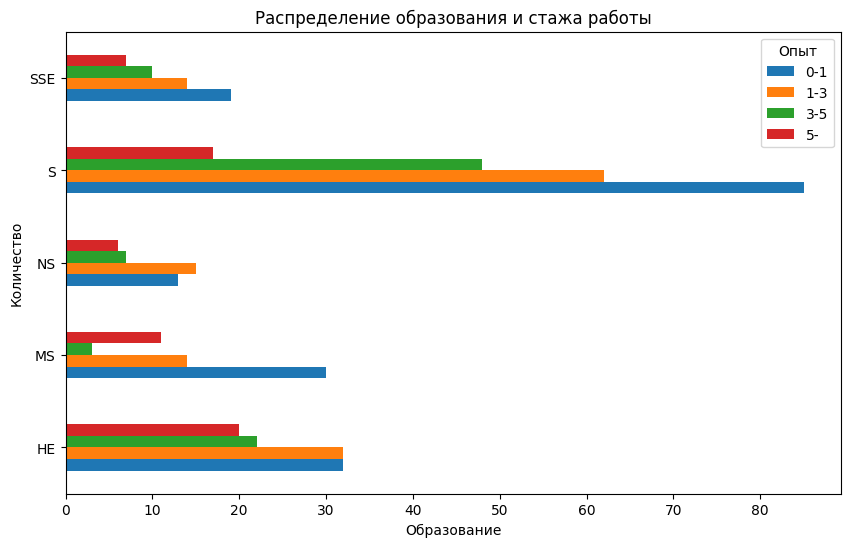

In [ ]:
import matplotlib.pyplot as plt

contingency_table.plot(kind='barh', figsize=(10, 6))

plt.title('Распределение образования и стажа работы')
plt.xlabel('Образование')
plt.ylabel('Количество')
plt.legend(title='Опыт')

plt.show()

In [ ]:
# Проведение критерия хи-квадрат
chi2, p_value, dof, expected = st.chi2_contingency(contingency_table)

# Вывод результатов
print("Значение хи-квадрат:", chi2)
print("p-значение:", p_value)
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу. Стаж работы зависит от уровня образования.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

Значение хи-квадрат: 22.507947679669225
p-значение: 0.032205915366036585
Отвергаем нулевую гипотезу. Стаж работы зависит от уровня образования.


# Задание 4.

Постройте 95-е% доверительные интервалы по выборкам из задания 1 для
среднего времени доставки курьерами, использующими и не использующими
новую опцию комбинирования нескольких видов транспорта в приложении.

### 1) Решение через формулу

**Доверительный интервал = среднее +- предел погрешности**

Формула:    

**Confidence interval = x̅ ± Za/2 * σ/√(n)**, где
- n — размер выборки - sample size
- x̅ — среднее значение, sum(x)/n - mean

 **Za/2 * σ/√(n)**  предел погрешности (estimated standard errors)

- σ — стандартное отклонение - standart deveation, (sum(x - x̅)**2 / n) ** 0.5
- Za/2 = коэффициент доверия - confidience coefficient- либо это ещё критическое значение (где а = доверительный уровень confidience level). Для а = 0.95, Za/2 = 0.475, в [таблицу Z-оценок](http://statsoft.ru/home/textbook/modules/sttable.html#t ) соответствующее значение для 0,475 = 1,96 (на пересечении строки 1,9 и столбца 0,06).

Следовательно, формула для 95-и% доверительного интервала = mean +- 1.96 * (σ/√(n))

In [ ]:
from scipy import stats as st
import pandas as pd
import numpy as np

# Загрузка данных
control_group = pd.read_csv("times_couriers_control.csv")
test_group = pd.read_csv("times_couriers_test.csv")

In [ ]:
control_group['time'].describe()

count    472.000000
mean      14.220763
std        5.772502
min        2.300000
25%        9.647500
50%       13.735000
75%       18.900000
max       29.040000
Name: time, dtype: float64

In [ ]:
# доверительный интервал для контрольной группы
z = 1.96
n = len(control_group['time'])
mean = sum(control_group['time']) / n
std = ((sum([(i - mean) ** 2 for i in control_group['time']])) / n) ** 0.5

# левый доверительный интервал
left_ci = mean - z * std / n**0.5
# правый доверительный интервал
right_ci = mean + z * std / n**0.5
print(f'Размер выборки: {n}\nСреднее: {mean}\nСтандартное отклонение: {std}')
print(f'95% Доверительный интервал для контрольной группы: от {left_ci} до {right_ci}')

Размер выборки: 472
Среднее: 14.220762711864408
Стандартное отклонение: 5.7663834253456585
95% Доверительный интервал для контрольной группы: от 13.700540862457013 до 14.740984561271803


In [ ]:
test_group['time'].describe()

count    472.000000
mean      15.390508
std        5.686440
min        3.530000
25%       10.520000
50%       15.215000
75%       20.342500
max       26.460000
Name: time, dtype: float64

In [ ]:
# доверительный интервал для тестовой группы
z = 1.96
n = len(test_group['time'])
mean = sum(test_group['time']) / n
std = ((sum([(i - mean) ** 2 for i in test_group['time']])) / n) ** 0.5

# левый доверительный интервал
left_ci = mean - z * std / n**0.5
# правый доверительный интервал
right_ci = mean + z * std / n**0.5
print(f'Размер выборки: {n}\nСреднее: {mean}\nСтандартное отклонение: {std}')
print(f'95% Доверительный интервал для контрольной группы: от {left_ci} до {right_ci}')

Размер выборки: 472
Среднее: 15.390508474576261
Стандартное отклонение: 5.680413097811866
95% Доверительный интервал для контрольной группы: от 14.878042551108027 до 15.902974398044496


### 2) решение через функцию

In [ ]:
from scipy import stats as st
import pandas as pd
import numpy as np

confidence_level = 0.95

# Загрузка данных
control_group = pd.read_csv("times_couriers_control.csv")
test_group = pd.read_csv("times_couriers_test.csv")

# Вычисление среднего и стандартного отклонения для контрольной группы
control_mean = control_group['time'].mean()
control_std = control_group['time'].std()

# Вычисление среднего и стандартного отклонения для тестовой группы
test_mean = test_group['time'].mean()
test_std = test_group['time'].std()

# Вычисление размера выборки для каждой группы
control_n = len(control_group)
test_n = len(test_group)

# Вычисление доверительных интервалов для средних значений
control_interval = st.t.interval(confidence_level, control_n, loc=control_mean, scale=control_std / np.sqrt(control_n))
test_interval = st.t.interval(confidence_level, test_n, loc=test_mean, scale=test_std / np.sqrt(test_n))

print("Контрольная группа")
print(f'Размер выборки: {control_n}\nСреднее: {control_mean}\nСтандартное отклонение: {control_std}')
print(f'95% Доверительный интервал для контрольной группы: {control_interval}')
print()
print('*' * 50)
print()
print("Тестовая группа")
print(f'Размер выборки: {test_n}\nСреднее: {test_mean}\nСтандартное отклонение: {test_std}')
print(f'95% Доверительный интервал для контрольной группы: {test_interval}')

Контрольная группа
Размер выборки: 472
Среднее: 14.220762711864404
Стандартное отклонение: 5.7725016057672445
95% Доверительный интервал для контрольной группы: (13.698659687026103, 14.742865736702706)

**************************************************

Тестовая группа
Размер выборки: 472
Среднее: 15.39050847457627
Стандартное отклонение: 5.686440063006167
95% Доверительный интервал для контрольной группы: (14.876189421898827, 15.904827527253714)
